In [1]:
import sys, os
if '..' not in sys.path:
    sys.path.append('..')
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tutorials.utils.plotting import breakdown

%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Ben\\Documents\\ai_taxes\\notebooks'

In [29]:
with open('../experiments/malthusian_open_borders/logs/dense_log.pickle', 'rb') as f:
    logs = pickle.load(f)
    
with open('../experiments/malthusian_open_borders/logs/mixing_weights.pickle', 'rb') as f:
    mixing = pickle.load(f)

In [30]:
mixing

{'foo_land': 0.8, 'bar_land': 0.2}

_______________:_ Agent  0 _____|_ Agent  1 _____|_ Agent  2 _____|_ Agent  3 _____|_ Agent  4 _____|_ Agent  5 ____
Cost (Wood)    :   2.32 (n= 34) |   1.93 (n= 55) |   2.13 (n= 46) |   3.06 (n= 16) |   1.41 (n= 27) |   2.13 (n= 39)
Cost (Stone)   :    ~~~~~~~~    |   2.67 (n=  6) |   1.46 (n= 26) |   1.36 (n= 11) |   0.78 (n=  9) |   1.29 (n= 34)

Income (Wood)  :   2.33 (n= 30) |   1.41 (n= 49) |   2.51 (n= 39) |   2.45 (n= 20) |   1.59 (n= 32) |   2.47 (n= 47)
Income (Stone) :   1.00 (n=  5) |   0.50 (n= 12) |   1.74 (n= 31) |   1.14 (n=  7) |   1.60 (n= 15) |   1.44 (n= 16)
Income (Build) :    ~~~~~~~~    |  10.89 (n=  1) |  26.30 (n=  8) |  10.11 (n=  3) |  14.57 (n=  5) |  19.07 (n= 12)


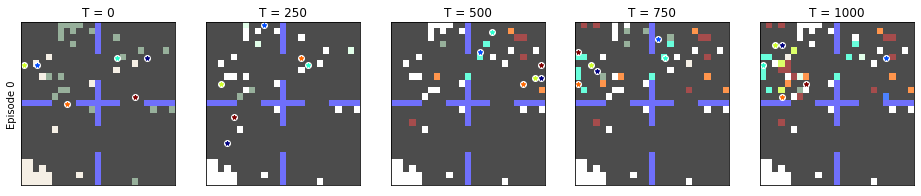

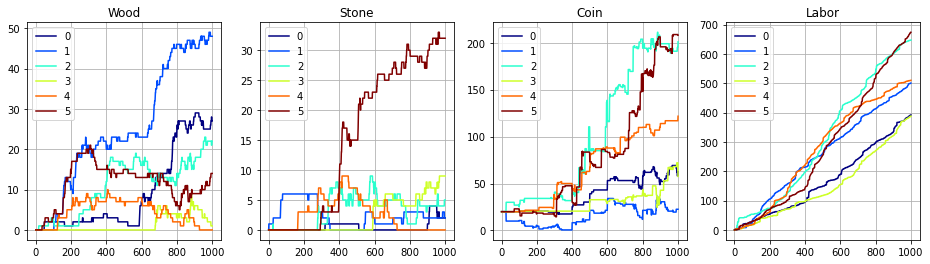

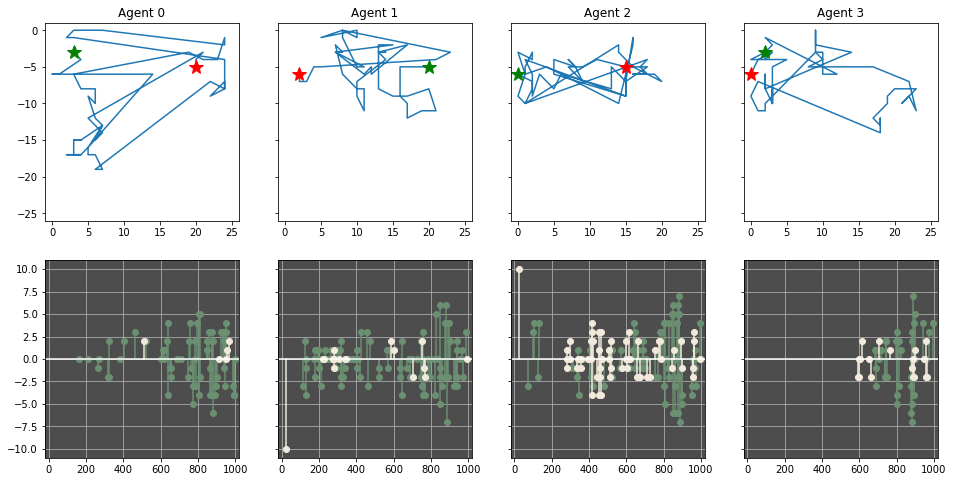

In [31]:
(fig0, fig1, fig2), incomes, endows, c_trades, all_builds, _report = breakdown(logs)

In [32]:
logs.keys()

dict_keys(['world', 'states', 'actions', 'rewards', 'Build', 'Trade', 'Gather', 'Citizenship', 'PeriodicTax'])

In [33]:
logs['world'][0].keys()

dict_keys(['Stone', 'Wood', 'House', 'Water', 'StoneSourceBlock', 'WoodSourceBlock'])

In [34]:
df = dict(step=[], agent=[], inventory_coin=[], inventory_stone=[], inventory_wood=[], labor=[], skill=[], nation=[],
          nation_idx=[], income=[], tax_paid=[], marginal_rate=[], effective_rate=[], lump_sum=[])

In [35]:
for i, s in enumerate(logs['states']):
    for agent, agent_s in s.items():
        if agent != 'p':
            df['step'].append(i)
            df['agent'].append(agent)
            df['inventory_coin'].append(agent_s['inventory']['Coin'])
            df['inventory_stone'].append(agent_s['inventory']['Stone'])
            df['inventory_wood'].append(agent_s['inventory']['Wood'])
            df['labor'].append(agent_s['endogenous']['Labor'])
            df['skill'].append(agent_s['build_skill'])
            df['nation'].append(agent_s['nation'])
            df['nation_idx'].append(agent_s['nation_idx'])
            if i > 0 and isinstance(s['p']['taxes'][-1], dict):
                taxes = s['p']['taxes'][-1][agent]
                df['income'].append(taxes['income'])
                df['tax_paid'].append(taxes['tax_paid'])
                df['marginal_rate'].append(taxes['marginal_rate'])
                df['effective_rate'].append(taxes['effective_rate'])
                df['lump_sum'].append(taxes['lump_sum'])
            else:
                df['income'].append(np.nan)
                df['tax_paid'].append(np.nan)
                df['marginal_rate'].append(np.nan)
                df['effective_rate'].append(np.nan)
                df['lump_sum'].append(np.nan)

In [49]:
df = pd.DataFrame(df)

In [51]:
df.dropna()

,step,agent,inventory_coin,inventory_stone,inventory_wood,labor,skill,nation,nation_idx,income,tax_paid,marginal_rate,effective_rate,lump_sum,net_income
600,100,0,20.583333,0.0,0.0,27.50,0.391280,foo_land,0,0.000000,0.000000,0.35,0.000000,0.583333,0.583333
601,100,1,10.583333,1.0,0.0,23.00,0.044611,foo_land,0,-10.000000,0.000000,0.00,0.000000,0.583333,-9.416667
602,100,2,25.133333,0.0,0.0,53.50,0.815155,foo_land,0,7.000000,2.450000,0.35,0.350000,0.583333,5.133333
603,100,3,20.583333,0.0,0.0,17.00,0.005562,foo_land,0,0.000000,0.000000,0.35,0.000000,0.583333,0.583333
604,100,4,20.583333,0.0,0.0,19.00,0.228378,foo_land,0,0.000000,0.000000,0.35,0.000000,0.583333,0.583333
605,100,5,22.533333,0.0,1.0,29.25,0.453530,foo_land,0,3.000000,1.050000,0.35,0.350000,0.583333,2.533333
1200,200,0,20.583333,0.0,0.0,54.50,0.391280,foo_land,0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1201,200,1,4.583333,2.0,8.0,105.00,0.044611,foo_land,0,-6.000000,0.000000,0.00,0.000000,0.000000,-6.000000
1202,200,2,34.133333,0.0,0.0,73.50,0.815155,foo_land,0,9.000000,0.000000,0.00,0.000000,0.000000,9.000000
1203,200,3,20.608333,0.0,0.0,45.00,0.005562,bar_land,1,0.000000,0.000000,0.05,0.000000,0.025000,0.025000


In [48]:
df['net_income'] = df['income'] - df['tax_paid'] + df['lump_sum']

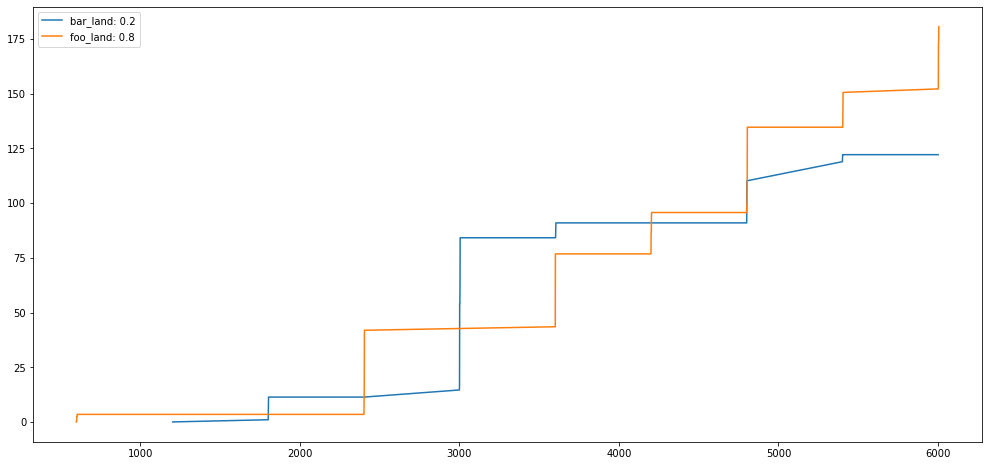

In [44]:
fig, ax = plt.subplots(figsize=(17, 8))
legend = []
for key, grp in df.dropna().groupby('nation'):
    ax.plot(grp.cumsum()['tax_paid'])
    legend.append(f'{key}: {mixing[key]}')
plt.legend(legend)

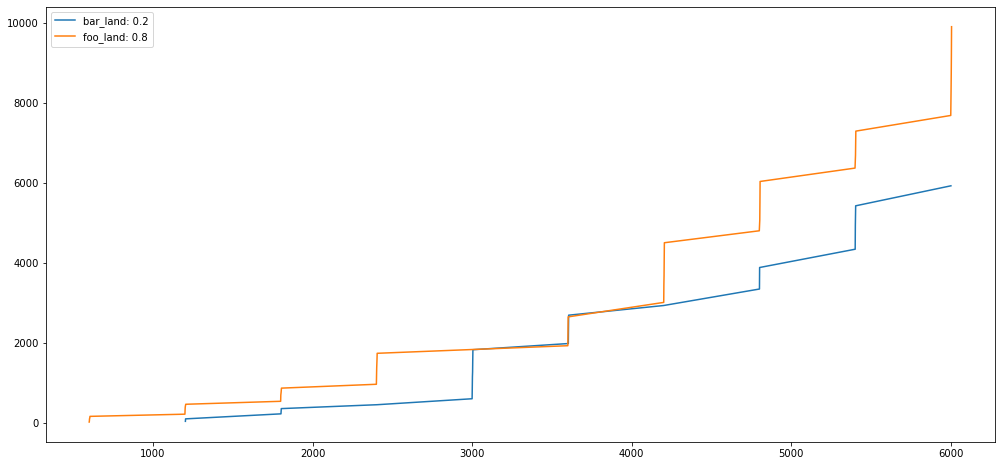

In [45]:
fig, ax = plt.subplots(figsize=(17, 8))
legend = []
for key, grp in df.dropna().groupby('nation'):
    ax.plot(grp.cumsum()['labor'])
    legend.append(f'{key}: {mixing[key]}')
plt.legend(legend)

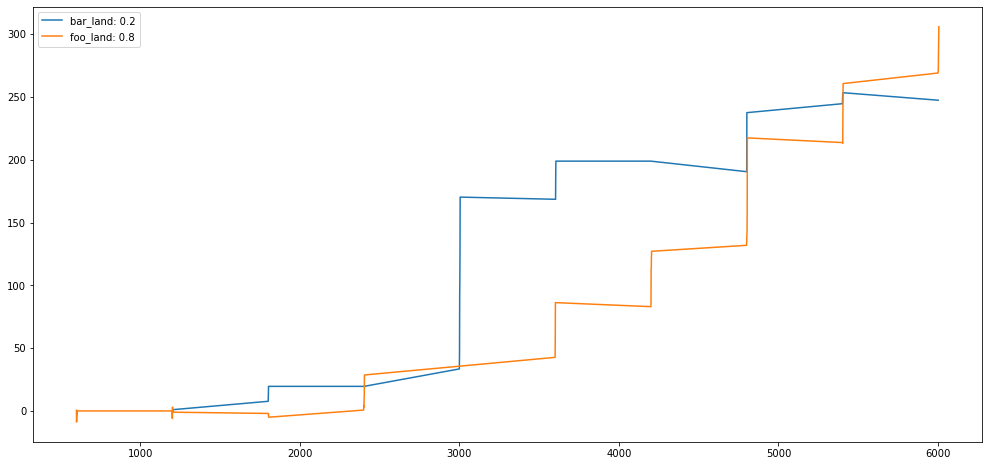

In [50]:
fig, ax = plt.subplots(figsize=(17, 8))
legend = []
for key, grp in df.dropna().groupby('nation'):
    ax.plot(grp.cumsum()['net_income'])
    legend.append(f'{key}: {mixing[key]}')
plt.legend(legend)

C:\Users\Ben\Anaconda3\envs\WorldModelsDk\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


IndexError: cannot do a non-empty take from an empty axes.

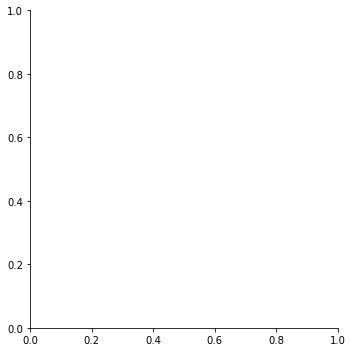

In [25]:
for key, grp in df.dropna().groupby('step'):
    sns.displot(grp, kind='kde', x='skill', y='lump_sum', hue='nation')

In [70]:
len([g for g in logs['Build'] if len(g) > 0])

20

In [71]:
len([g for g in logs['Gather'] if len(g) > 0])

181

In [72]:
n_gather_in_actions = 0
for la in logs['actions']:
    for key, item in la.items():
        if 'Build' in item.keys():
            n_gather_in_actions += 1
n_gather_in_actions

20

In [73]:
logs['Citizenship']

[[],
 [],
 [],
 [],
 [[{'agent_idx': 3, 'from_nation': 'bar_land', 'to_nation': 'foo_land'}]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[{'agent_idx': 4, 'from_nation': 'foo_land', 'to_nation': 'bar_land'}]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[{'agent_idx': 3, 'from_nation': 'foo_land', 'to_nation': 'bar_land'}],
  [{'agent_idx': 4, 'from_nation': 'bar_land', 'to_nation': 'foo_land'}]],
 [],
 [],
 [],
 [],
 [],
 [],
 [[{'agent_idx': 2, 'from_nation': 'foo_land', 'to_nation': 'bar_land'}]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[{'agent_idx': 5, 'from_nation': 'foo_land', 'to_nation': 'bar_land'}]],
 [],
 [],
 [],
 [],
 [],
 [],
 [[{'agent_idx': 1, 'from_natio

In [74]:
planner_rewards = pd.DataFrame([r['p'] for r in logs['rewards']])

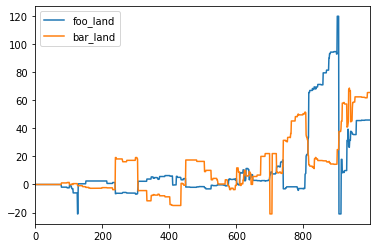

In [75]:
planner_rewards.cumsum().plot()

In [76]:
agent_rewards = pd.DataFrame(logs['rewards']).drop('p', 1)

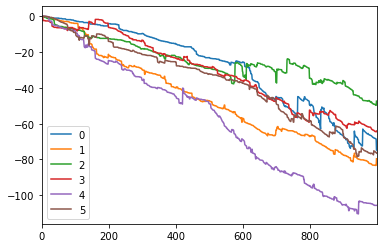

In [77]:
agent_rewards.cumsum().plot()